# Thompson Sampling

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [31]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [32]:
import random
N = 500
d = 10
ads_selected = []
num_rewards_0 = [0]*d
num_rewards_1 = [0]*d
total_rewards = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(num_rewards_1[i] + 1, num_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if (reward==1):
    num_rewards_1[ad] = num_rewards_1[ad] + 1
  else:
    num_rewards_0[ad] = num_rewards_0[ad] + 1
  total_rewards = total_rewards + reward

## Visualising the results - Histogram

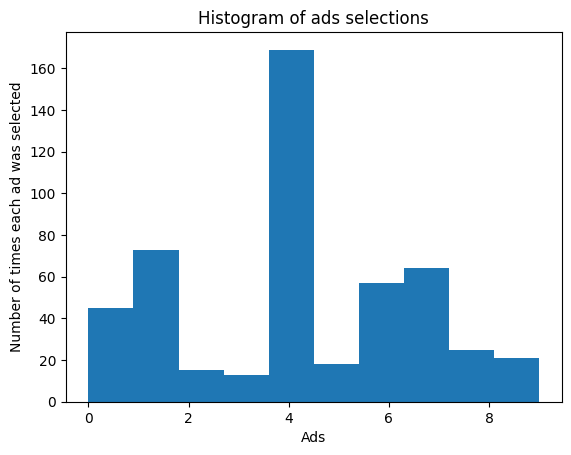

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()